In [3]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read input file, note the encoding is specified here 
# It may be different in your text file
df = pd.read_csv('data/surfline_clean_data.csv')
df.head()

,dates,tokenized_title,tokenized_copy,tags_text,string_titles,string_copy,string_tags,word_count
0,NaN,"['Russo', 'Cam', 'A', 'watery', 'look', 'North...","['On', 'clear', 'winter', 'day', 'balmy', 'coa...","[""CBD"",""Daniel Russo"",""InnerG"",""pipeline""]",Russo Cam A watery look North Shore secret soc...,On clear winter day balmy coastline Oahu North...,CBD Daniel Russo InnerG pipeline,197
1,2020-11-02,"['Watch', 'Meet', 'Kehu', 'Butler', '20', 'Yea...","['If', 'know', 'Kehu', 'Butler', 'yet', 'bette...",[],Watch Meet Kehu Butler 20 Year Old Rising Surf...,If know Kehu Butler yet better way get acquain...,NaN,105
2,2020-10-17,"['With', 'No', '2020', 'Olympics', 'How', 'Sur...","['Two', 'historic', 'things', 'Surfing', 'inau...","[""ISA"",""Jordy Smith"",""Olympics"",""sally fitzgib...",With No 2020 Olympics How Surfers Feeling,Two historic things Surfing inaugural debut Ol...,ISA Jordy Smith Olympics sally fitzgibbons,280
3,2020-10-13,"['Watch', 'Tom', 'Carroll', 'Matt', 'Grainger'...","['We', 'got', 'kinds', 'reef', 'around', 'play...",[],Watch Tom Carroll Matt Grainger Break Down Tow...,We got kinds reef around play When two time Wo...,NaN,148
4,2021-01-18,"['A', 'Powerful', 'South', 'SSE', 'Groundswell...","['The', 'month', 'January', 'exactly', 'renown...",[],A Powerful South SSE Groundswell Is About To R...,The month January exactly renowned big south s...,NaN,514


In [5]:

string = df['string_copy'][1]
string

'If know Kehu Butler yet better way get acquainted young man excellent clip We get glimpse 20 year old rising surf star life Mount Maunganui Aotearoa well beautiful insight rich culture And course see shred smooth power made Australasian Junior Champ back 2018 one watch future Plus ahh pretty colourful things say New Zealand pies versus Aussie pies We got kinds reef around play Get ready East Coast rumble Ten Things Surfing Internet Week That Was January 15 2021 Long serving legendary stalwart Australian Queensland surfing passes away 82 The Most Core Surf Comp Year Ten Things Surfing Internet Week That Was January 9 2021 '


OK. The 10 most common words are as follows

get :  3
things :  3
surfing :  3
year :  2
surf :  2
pies :  2
ten :  2
internet :  2
week :  2
january :  2


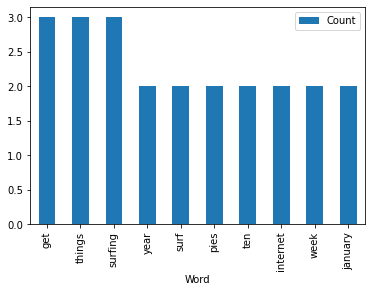

In [8]:
# Stopwords - customized your stopword list
stopwords = set(line.strip() for line in open('data/stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in string.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df1 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df1.plot.bar(x='Word',y='Count')

In [10]:
df1

,Word,Count
0,get,3
1,things,3
2,surfing,3
3,year,2
4,surf,2
5,pies,2
6,ten,2
7,internet,2
8,week,2
9,january,2
